In [6]:
from flyanalysis import braidz
from flyanalysis import braidz
from flyanalysis import filtering
from flyanalysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from flyanalysis.plotting import plot_mean_and_std
from flyanalysis.plotting import plot_trajectory

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240828_110359.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240828_110359.braidz using pyarrow


In [14]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=1)

shared_elements = list(set(median_obj_id) & set(duration_obj_id))
shared_elements

[1542]

In [16]:
grp = df[df.obj_id == shared_elements[0]]

In [17]:
grp

,obj_id,frame,timestamp,x,y,z,xvel,yvel,zvel,P00,P01,P02,P11,P12,P22,P33,P44,P55
177859,1542,3575227,1.724871e+09,0.014222,0.031723,0.214650,0.094232,-0.125581,-0.078573,1.549966e-07,-1.246048e-08,-1.126252e-07,1.031705e-07,1.247954e-08,3.129780e-07,0.003418,0.002389,0.006549
177860,1542,3575228,1.724871e+09,0.012756,0.030195,0.215449,-0.062815,-0.145312,0.016307,2.838420e-07,-5.949605e-08,-2.891308e-07,1.215233e-07,9.752520e-08,5.473038e-07,0.002026,0.001294,0.003296
177861,1542,3575229,1.724871e+09,0.012555,0.028777,0.215270,-0.041382,-0.141723,0.002643,3.525301e-07,-1.778768e-07,-3.999209e-07,3.683723e-07,4.145591e-07,1.073979e-06,0.001643,0.001946,0.003233
177862,1542,3575230,1.724871e+09,0.013227,0.027509,0.215010,0.011286,-0.130644,-0.003317,2.908807e-07,-8.463827e-08,-3.113067e-07,1.416094e-07,1.453490e-07,6.006710e-07,0.001443,0.001149,0.001859
177863,1542,3575231,1.724871e+09,0.014285,0.026085,0.214104,0.052209,-0.129682,-0.028624,2.725394e-07,-6.726677e-08,-2.804088e-07,1.174694e-07,1.090624e-07,5.152167e-07,0.001431,0.001188,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178090,1542,3575458,1.724871e+09,0.190002,0.023372,0.066221,0.151790,-0.108686,-0.070091,1.384073e-06,3.260189e-06,-6.320855e-06,9.991423e-06,-1.881152e-05,3.688303e-05,0.001911,0.003639,0.009251
178091,1542,3575459,1.724871e+09,0.191635,0.022304,0.065568,0.157151,-0.107636,-0.068387,1.749414e-06,4.263108e-06,-8.314158e-06,1.272410e-05,-2.425299e-05,4.771235e-05,0.001949,0.003806,0.010042
178092,1542,3575460,1.724871e+09,0.192766,0.021146,0.064677,0.136486,-0.112351,-0.075516,2.199559e-06,5.465468e-06,-1.071706e-05,1.590831e-05,-3.062973e-05,6.047495e-05,0.001991,0.003971,0.010829
178093,1542,3575461,1.724871e+09,0.194019,0.019895,0.063858,0.131451,-0.117790,-0.078956,2.723671e-06,6.852873e-06,-1.351583e-05,1.955888e-05,-3.800892e-05,7.538061e-05,0.002024,0.004126,0.011637


<Axes: >

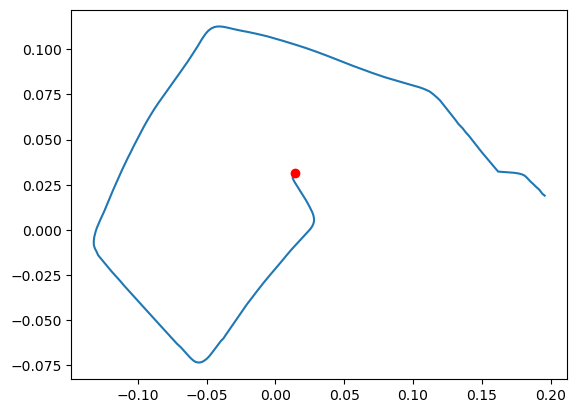

In [18]:
plot_trajectory(grp)

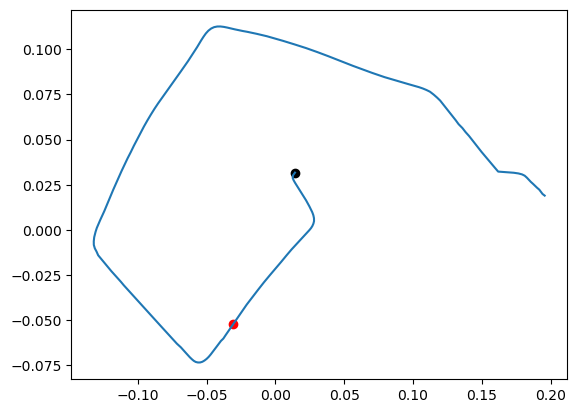

In [20]:
traj = grp[["x", "y"]].to_numpy()
fig = plt.figure()
plt.plot(traj[:, 0], traj[:, 1])
plt.scatter(traj[50, 0], traj[50, 1], color="red")
plt.scatter(traj[0, 0], traj[0, 1], color="black")
plt.show()